# Loading Regression Data
Load appropriate dataset here

In [1]:
from sklearn.datasets import load_diabetes

# Loading the dataset from scikit learn.
df = load_diabetes(as_frame=True).frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Multivariate Linear Regression
(Split your dataset here)

In [2]:
from sklearn.model_selection import train_test_split

# Creating the independent and dependent sets of variables from the main dataframe. 
x = df.drop("target", axis=1)
y = df["target"]

# Spliting the dataset in train and test sets. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0) 

## Feature selection
### Pearsons correlation
#### Correlation matrix
(Create coleration matrix here)

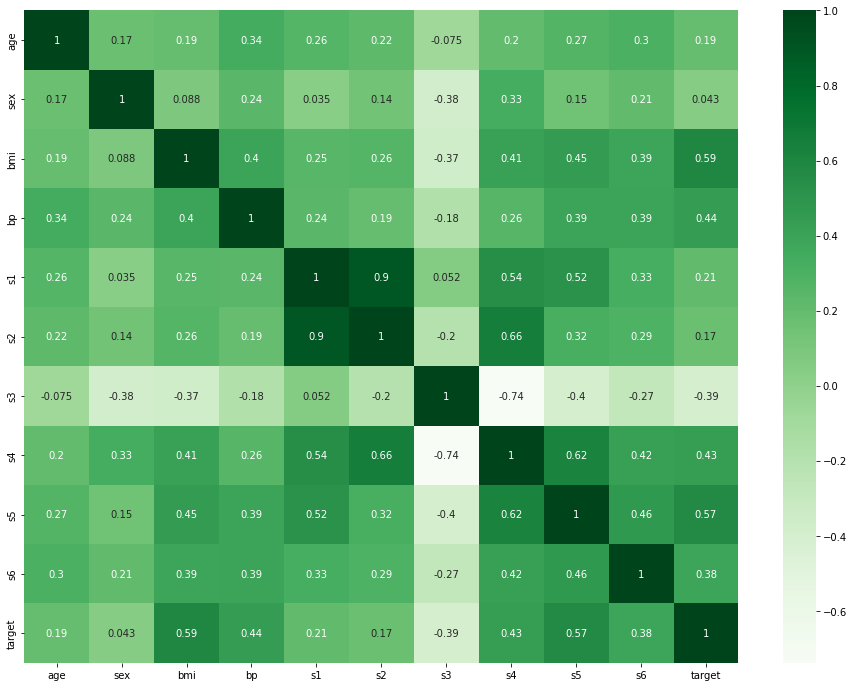

In [3]:
from re import A
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Greens)
plt.show() 

#### Use pearsons correlation to get the best 5 features. Get mse and rsquared on the testing set

In [4]:
from bdb import set_trace
from sklearn.feature_selection import SelectKBest, r_regression

k_in = 5
selector = SelectKBest(r_regression, k=k_in).fit(x_train, y_train)
x_train_pearson = selector.transform(x_train)
x_test_pearson  = selector.transform(x_test)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating a linear regression model and predicting the target feature
model = LinearRegression().fit(x_train_pearson, y_train)
y_pred = model.predict(x_test_pearson)

# Getting the metrics values for my model. 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f"mean squared error: {mse}, r2 score: {r2}")

mean squared error: 3146.1155029775973, r2 score: 0.5100859243647621


##### Show which features were selected

In [6]:
import numpy as np 

top_n = np.argsort(selector.scores_)[-k_in:]
print(df.iloc[:,top_n].columns)

Index(['s6', 'bp', 's4', 's5', 'bmi'], dtype='object')


### Forward selection

#### Use forward selection to get best features with a tol of 0.01 for mean squared error (Calculate mse and rsquared)

In [7]:
from sklearn.feature_selection import SequentialFeatureSelector 

reg = LinearRegression()
sfs = SequentialFeatureSelector(estimator=reg, n_features_to_select='auto', scoring='neg_mean_squared_error', tol=0.01, direction='forward', )
sfs.fit(x_train, y_train)
x_train_fwd = sfs.transform(x_train)
x_test_fwd = sfs.transform(x_test)

In [8]:
# Generating a linear regression model and predicting the target feature. 
model = LinearRegression().fit(x_train_fwd, y_train)
y_pred = model.predict(x_test_fwd)

# Getting the metrics values for my model. 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f"mean squared error: {mse}, r2 score: {r2}")

mean squared error: 2957.909868834236, r2 score: 0.5393933637112904


##### Show which features were selected

In [9]:
df.columns[sfs.get_support(indices=True)]

Index(['sex', 'bmi', 'bp', 's1', 's4', 's5'], dtype='object')

### Backward selection
#### Use backward selection to get best features with a tol of 0.01 for mean squared error (Calculate mse and rsquared)

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector 

reg = LinearRegression()
sfs = SequentialFeatureSelector(estimator=reg, n_features_to_select='auto', scoring='neg_mean_squared_error', tol=0.01, direction='backward', )
sfs.fit(x_train, y_train)
x_train_bwd = sfs.transform(x_train)
x_test_bwd = sfs.transform(x_test)  

In [11]:
# Generating a linear regression model and predicting the target feature
model = LinearRegression().fit(x_train_bwd, y_train)
y_pred = model.predict(x_test_bwd)

# Getting the metrics values for my model. 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f"mean squared error: {mse}, r2 score: {r2}")

mean squared error: 2957.909868834236, r2 score: 0.5393933637112904


#### Show which features were selected

In [12]:
df.columns[sfs.get_support(indices=True)]

Index(['sex', 'bmi', 'bp', 's1', 's4', 's5'], dtype='object')

### Recursive Feature Elimination
#### Use recursive feature elimination to get the best 5 features (Calculate mse and rsquared)

In [13]:
from sklearn.feature_selection import RFE

reg = LinearRegression()
selector = RFE(reg, n_features_to_select=5, step=1)
selector.fit(x_train, y_train) 
x_train_rfe = selector.transform(x_train) 
x_test_rfe = selector.transform(x_test) 

In [14]:
# Generating a linear regression model and predicting the target feature
model = LinearRegression().fit(x_train_rfe, y_train)
y_pred = model.predict(x_test_rfe) 

# Getting the metrics values for my model. 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f"mean squared error: {mse}, r2 score: {r2}") 

mean squared error: 2993.775178809707, r2 score: 0.5338084065896036


##### Show which features were selected

In [15]:
df.columns[selector.get_support(indices=True)] 

Index(['bmi', 'bp', 's1', 's2', 's5'], dtype='object')

In [16]:
# This is another wat of showing the selected features. 
selector.get_feature_names_out()

array(['bmi', 'bp', 's1', 's2', 's5'], dtype=object)

##### Show ranking of each feature in a dataframe

In [17]:
import pandas as pd
pd.DataFrame(list(zip(df.columns, selector.ranking_)), columns=['Feature', 'Ranking'])

,Feature,Ranking
0,age,6
1,sex,2
2,bmi,1
3,bp,1
4,s1,1
5,s2,1
6,s3,5
7,s4,3
8,s5,1
9,s6,4


## Cross validation
### Use shufflesplit cross validation,
 - Use LinearRegression 
 - n_splits=4.
 - test size of 25%
  (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set

In [18]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0) 
i = 0
for train_index, test_index in rs.split(df): 
    x_train_rs, x_test_rs = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train_rs, y_test_rs = y[train_index], y[test_index]
    
    # Generating a LR model and predicting the target feature for each round of coss validation. 
    reg = LinearRegression() 
    reg.fit(x_train_rs, y_train_rs) 
    y_pred = reg.predict(x_test_rs)

    # Calculating the mean squared error and r2_score for each round. 
    mse = mean_squared_error(y_test_rs, y_pred)
    r2 = r2_score(y_test_rs, y_pred)
    print(f"Round {i}: mse: {mse}, R squared: {r2} .")
    i += 1



Round 0: mse: 3180.159648155844, R squared: 0.35940880381777096 .
Round 1: mse: 2972.925869135974, R squared: 0.5335613748772718 .
Round 2: mse: 3141.010233992259, R squared: 0.44082298859439684 .
Round 3: mse: 2599.04451378182, R squared: 0.5851401640675551 .


# Regularized Linear Regression
## Use RidgeCV class to find best aplha.(Calculate the mse and rsquared). Store and print best alpha found

In [19]:
from sklearn.linear_model import RidgeCV

# Splitting the main dataframe from the start, because in previous cells, I changed the x_train and etc., values. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0) 

reg_cv = RidgeCV(alphas=[1e-3,1e-2,1e-1,1]).fit(x_train, y_train)

# Saving the best alpha to another variable, and printing it. 
alfa = reg_cv.alpha_
print(f"alpha: {alfa}") 

alpha: 0.1


In [20]:
# Predicting the target feature using the Riged CV and alpha = 0.1 .
y_pred = reg_cv.predict(x_test) 

# Getting the metrics values for my model. 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f"mean squared error: {mse}, r2 score: {r2}") 

mean squared error: 3021.622198866304, r2 score: 0.5294720600450118


# Cross validation
### Use shufflesplit cross validation with:
    Ridge with the best alpha found,
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set

In [21]:
from sklearn.linear_model import Ridge

rs = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0) 
i = 0 
for train_index, test_index in rs.split(df): 
    x_train_ridge, x_test_ridge = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train_ridge, y_test_ridge = y[train_index], y[test_index]
    
    # Generating a Ridge regressor and Predicting the target feature for each round of coss validation. 
    reg = Ridge(alpha=alfa).fit(x_train_ridge, y_train_ridge) 
    y_pred = reg.predict(x_test_ridge)

    # Calculating the mean squared error and r2_score for each round. 
    mse = mean_squared_error(y_test_ridge, y_pred)
    r2 = r2_score(y_test_ridge, y_pred)
    print(f"Round {i}: mse: {mse}, R squared: {r2} .")
    i += 1



Round 0: mse: 3132.420603081688, R squared: 0.36902505437499833 .
Round 1: mse: 2955.1781107873203, R squared: 0.5363459179057741 .
Round 2: mse: 3076.561872621672, R squared: 0.45229638072511535 .
Round 3: mse: 2693.259713195174, R squared: 0.570101521226424 .


### Use shufflesplit cross validation with:
    RidgeCV with the alphas [0.001, 0.01, 0.1, 1],
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set
    Print the alpha picked after every calculation

In [22]:
from sklearn.linear_model import RidgeCV

rs = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0) 
i = 0 
for train_index, test_index in rs.split(df): 
    x_train_ridge, x_test_ridge = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train_ridge, y_test_ridge = y[train_index], y[test_index]
    
    # Generating a Ridge regressor and Predicting the target feature for each round of coss validation. 
    reg = RidgeCV(alphas=[1e-3,1e-2,1e-1,1]).fit(x_train_ridge, y_train_ridge) 
    y_pred = reg.predict(x_test_ridge)

    # Calculating the mean squared error and r2_score for each round. 
    mse = mean_squared_error(y_test_ridge, y_pred)
    r2 = r2_score(y_test_ridge, y_pred)
    print(f"Round {i}: mse: {mse}, R squared: {r2} .")
    i += 1



Round 0: mse: 3132.420603081681, R squared: 0.3690250543749999 .
Round 1: mse: 2960.435745715143, R squared: 0.5355210187609314 .
Round 2: mse: 3076.561872621673, R squared: 0.45229638072511524 .
Round 3: mse: 2693.2597131951816, R squared: 0.5701015212264227 .


## Learning Curves
### Plot your training mse and testing mse over increasing examples

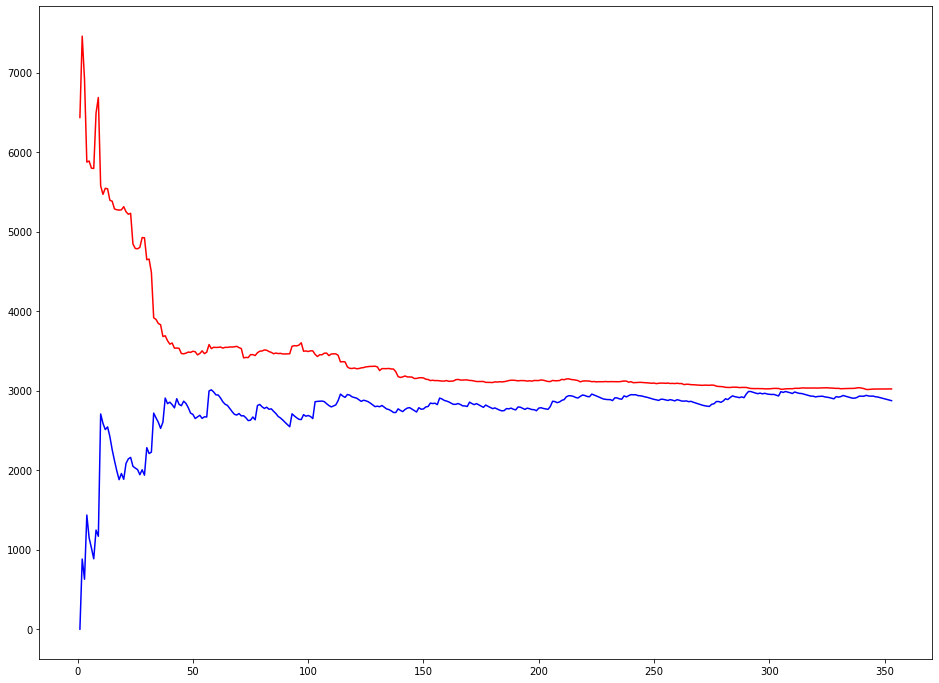

In [23]:
import matplotlib.pyplot as plt

train_m_mse_holder, test_m_mse_holder  = {}, {}
for i in range(1, len(x_train)+1):
    reg = Ridge(alpha=alfa).fit(x_train.iloc[:i,:], y_train.iloc[:i])
    train_mse = mean_squared_error(y_train.iloc[:i], reg.predict(x_train.iloc[:i,:])) 
    test_mse = mean_squared_error(y_test, reg.predict(x_test))
    
    # Putting the value of iteration as the key and the value of mses as the value for dictionaries. 
    train_m_mse_holder[i] = train_mse
    test_m_mse_holder[i] = test_mse

# Turning the dictionaries to list of tuples, and sort them with respect to the number of input to calculate the mse. 
list_train_mse = sorted(train_m_mse_holder.items())
list_test_mse = sorted(test_m_mse_holder.items())

# Unzipping the list of tuples into two different lists for both train and test sets (I mean their mses'). 
train_x, train_y = zip(*list_train_mse) 
test_x, test_y = zip(*list_test_mse) 

# Plotting the mse changes in both train and test sets. 
plt.figure(figsize=(16,12))
plt.plot(train_x, train_y, color='blue')
plt.plot(test_x, test_y, color='red')
plt.show()

# Lasso
## Use LassoCV class to find best aplha.(Calculate the mse and rsquared). Store and Print best alpha found

In [24]:
from sklearn.linear_model import LassoCV

# Splitting the main dataframe from the start, because in previous cells, I changed the x_train and etc., values. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=0) 

lasso_cv = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
y_pred = lasso_cv.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

print(f"mean squared error: {mse}, r2 score: {r2}") 

mean squared error: 3020.901237350059, r2 score: 0.529584328394494


In [25]:
alfa = lasso_cv.alpha_
alfa

0.1

### Figure out which features were selected by Lasso

In [26]:
indexes = np.nonzero(lasso_cv.coef_)
print(df.columns[indexes])
print(indexes[0])

Index(['sex', 'bmi', 'bp', 's2', 's3', 's5', 's6'], dtype='object')
[1 2 3 5 6 8 9]


### Use shufflesplit cross validation with:
    regular Lasso with the best alpaha you got,
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set

In [27]:
from sklearn.linear_model import Lasso

rs = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0) 
i = 0 
for train_index, test_index in rs.split(df): 
    x_train_lasso, x_test_lasso = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train_lasso, y_test_lasso = y[train_index], y[test_index]
    
    # Generating a Lasso regressor and Predicting the target feature for each round of coss validation. 
    lasso = Lasso(alpha=alfa).fit(x_train_lasso, y_train_lasso) 
    y_pred = lasso.predict(x_test_lasso)

    # Calculating the mean squared error and r2_score for each round. 
    mse = mean_squared_error(y_test_lasso, y_pred)
    r2 = r2_score(y_test_lasso, y_pred)
    print(f"Round {i}: mse: {mse}, R squared: {r2} .")
    i += 1



Round 0: mse: 3202.0167649897953, R squared: 0.3550060447846277 .
Round 1: mse: 3018.149075374345, R squared: 0.5264660583204558 .
Round 2: mse: 3112.7205436230643, R squared: 0.44585924869410687 .
Round 3: mse: 2643.8696887847855, R squared: 0.5779851635861226 .


### Use shufflesplit cross validation with:
    LassoCV with the alphas [0.001, 0.01, 0.1, 1],
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set
    Print the alpha picked after every calculation

In [28]:
from sklearn.linear_model import LassoCV

rs = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0) 
i = 0 
for train_index, test_index in rs.split(df): 
    x_train_lasso, x_test_lasso = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train_lasso, y_test_lasso = y[train_index], y[test_index]
    
    # Generating a Lasso regressor and Predicting the target feature for each round of coss validation. 
    lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train_lasso, y_train_lasso) 
    y_pred = lasso.predict(x_test_lasso)

    # Calculating the mean squared error and r2_score for each round. 
    mse = mean_squared_error(y_test_lasso, y_pred)
    r2 = r2_score(y_test_lasso, y_pred)
    print(f"Round {i}: mse: {mse}, R squared: {r2} .")
    i += 1



Round 0: mse: 3202.0167649897953, R squared: 0.3550060447846277 .
Round 1: mse: 2970.7591239306457, R squared: 0.5339013274018394 .
Round 2: mse: 3112.7205436230643, R squared: 0.44585924869410687 .
Round 3: mse: 2643.8696887847855, R squared: 0.5779851635861226 .


## Just for my own Curiocity
## Learning Curves

c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


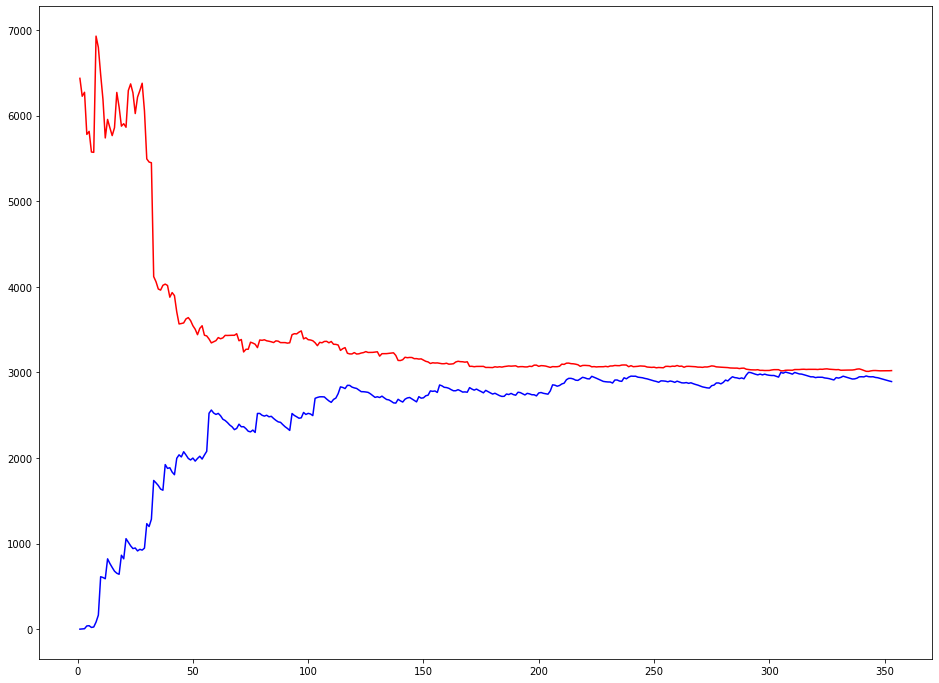

In [30]:
import matplotlib.pyplot as plt

train_m_mse_holder, test_m_mse_holder  = {}, {}
for i in range(1, len(x_train)+1):
    lasso = Lasso(alpha=alfa).fit(x_train.iloc[:i,:], y_train.iloc[:i])
    train_mse = mean_squared_error(y_train.iloc[:i], lasso.predict(x_train.iloc[:i,:])) 
    test_mse = mean_squared_error(y_test, lasso.predict(x_test))
    
    # Putting the value of iteration as the key and the value of mses as the value for dictionaries. 
    train_m_mse_holder[i] = train_mse
    test_m_mse_holder[i] = test_mse

# Turning the dictionaries to list of tuples, and sort them with respect to the number of input to calculate the mse. 
list_train_mse = sorted(train_m_mse_holder.items())
list_test_mse = sorted(test_m_mse_holder.items())

# Unzipping the list of tuples into two different lists for both train and test sets (I mean their mses'). 
train_x, train_y = zip(*list_train_mse) 
test_x, test_y = zip(*list_test_mse) 

# Plotting the mse changes in both train and test sets. 
plt.figure(figsize=(16,12))
plt.plot(train_x, train_y, color='blue')
plt.plot(test_x, test_y, color='red')
plt.show()

_____________
<b style= color:cyan>||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||</b>
________________________

# Load Classification Data
(Load appropriate dataset here)

In [31]:
from ast import AsyncFunctionDef
from sklearn.datasets import load_iris

df = load_iris(as_frame=True).frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Multinomial Logistic Regression
(split your data into a train and test set here)

In [32]:
x = df.drop("target", axis=1)
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True, random_state=0)
print(f"len train {len(x_train)} len test {len(x_test)}")

len train 120 len test 30


# Feature scaling
(feature scale your data here)

In [33]:
from tkinter.filedialog import LoadFileDialog
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

from sklearn.metrics import accuracy_score
print(f"mse: {mean_squared_error(y_test, y_pred)}, \
    accuracy: {accuracy_score(y_test, y_pred, normalize=True)}")

mse: 0.0,     accuracy: 1.0


## Feature Selection
### Use chisquare feature_selection to select the best 2 features to use (Calculate the log_loss and accuracy)

In [34]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.metrics import log_loss

k_in = 2 
selector = SelectKBest(chi2, k=k_in).fit(x_train_scaled, y_train)
x_train_scaled_chi2 = selector.transform(x_train_scaled)
x_test_scaled_chi2 = selector.transform(x_test_scaled)

model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(x_train_scaled_chi2, y_train)
y_pred = model.predict(x_test_scaled_chi2)
y_pred_log = model.predict_proba(x_test_scaled_chi2)

print(f"accuracy: {accuracy_score(y_test, y_pred, normalize=True)}, \
    log_loss: {log_loss(y_test, y_pred_log)}") 

accuracy: 1.0,     log_loss: 0.036096881078651714


#### Show which features were selected

In [35]:
x.iloc[:,selector.get_support(indices=True)].columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

### Use forward selection to get best features with a tol of 0.1 for accuracy (Calculate the log_loss and accuracy)

In [36]:
clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none') 
sfs = SequentialFeatureSelector(clf, n_features_to_select="auto", 
    scoring='accuracy', tol=0.1, direction='forward') 

sfs.fit(x_train_scaled, y_train) 
x_train_scaled_fwd = sfs.transform(x_train_scaled) 
x_test_scaled_fwd = sfs.transform(x_test_scaled) 
model = LogisticRegression(penalty='none', solver='lbfgs') 
model.fit(x_train_scaled_fwd, y_train) 
y_pred = model.predict(x_test_scaled_fwd) 
y_pred_log = model.predict_proba(x_test_scaled_fwd) 

print(f"accuracy: {accuracy_score(y_test, y_pred, normalize=True)}, \
    log_loss: {log_loss(y_test, y_pred_log)}") 

accuracy: 0.9666666666666667,     log_loss: 0.14306395442265357


#### Show which features were selected

In [37]:
sfs.get_support()

array([False, False, False,  True])

In [38]:
x.iloc[:, sfs.get_support(True)].columns

Index(['petal width (cm)'], dtype='object')

### Use backward selection to get best features with a tol of 0.1 for accuracy (Calculate the log_loss and accuracy)

In [39]:
clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='l2') 
sfs = SequentialFeatureSelector(clf, n_features_to_select="auto", 
    scoring='accuracy', tol=0.1, direction='backward') 

sfs.fit(x_train_scaled, y_train) 
x_train_scaled_bwd = sfs.transform(x_train_scaled) 
x_test_scaled_bwd = sfs.transform(x_test_scaled) 
model = LogisticRegression(penalty='none', solver='lbfgs') 
model.fit(x_train_scaled_bwd, y_train) 
y_pred = model.predict(x_test_scaled_bwd) 
y_pred_log = model.predict_proba(x_test_scaled_bwd) 

print(f"accuracy: {accuracy_score(y_test, y_pred, normalize=True)}, \
    log_loss: {log_loss(y_test, y_pred_log)}") 

accuracy: 1.0,     log_loss: 0.01624490802098242


#### Show which features were selected

In [40]:
x.iloc[:,sfs.get_support(indices=True)].columns

Index(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

### Recursive Feature Elimination
#### Use recursive feature elimination to get the best 2 features (Calculate the log_loss and accuracy)

In [41]:
from sklearn.feature_selection import RFE

clf = LogisticRegression()
selector = RFE(clf, n_features_to_select=2, step=1)
selector.fit(x_train_scaled, y_train)
x_train_scaled_rfe = selector.transform(x_train_scaled)
x_test_scaled_rfe = selector.transform(x_test_scaled)

model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(x_train_scaled_rfe, y_train)
y_pred = model.predict(x_test_scaled_rfe)
y_pred_log = model.predict_proba(x_test_scaled_rfe)

print(f"accuracy: {accuracy_score(y_test, y_pred, normalize=True)}, \
    log_loss: {log_loss(y_test, y_pred_log)}") 

accuracy: 1.0,     log_loss: 0.036096881078651714


#### Show which features were selected

In [42]:
x.iloc[:,selector.get_support(indices=True)].columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

##### Show ranking of each feature in a dataframe

In [43]:
pd.DataFrame(list(zip(df.columns, selector.ranking_)), columns=['Feature', 'Ranking'])

,Feature,Ranking
0,sepal length (cm),3
1,sepal width (cm),2
2,petal length (cm),1
3,petal width (cm),1


## Cross validation
### Use StratifiedShuffleSplit cross validation:
    Use LogisticRegression,
    n_splits=4.
    test set size of 25%
    (Calculate log_loss and accuracy for your testing sets). Write this in a for loop and print out your results for each test set

In [44]:
from pprint import pprint
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

i = 0
for train_index, test_index in rs.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    model = LogisticRegression(penalty='none', solver='lbfgs')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_log = model.predict_proba(x_test)

    print(f"Round {i}: accuracy: {accuracy_score(y_test, y_pred, normalize=True)}, \
    log_loss: {log_loss(y_test, y_pred_log)}") 

    i += 1

Round 0: accuracy: 0.9736842105263158,     log_loss: 0.9101810135543983
Round 1: accuracy: 0.9473684210526315,     log_loss: 1.817830336574248
Round 2: accuracy: 1.0,     log_loss: 0.021376850349003888
Round 3: accuracy: 0.9473684210526315,     log_loss: 0.09353251585098651


# Regularized Logistic Regression
## Use LogisticRegressionCV class to find best aplha for each class.(Calculate the log_loss and accuracy). print best alpha found for each class

In [45]:
from sklearn.linear_model import LogisticRegressionCV 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)
scaler = MinMaxScaler().fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf_cv = LogisticRegressionCV(Cs=[1e-3, 1e-2, 1e-1, 1], penalty='l2', solver='lbfgs', random_state=0)
clf_cv.fit(x_train_scaled, y_train)
y_pred = clf_cv.predict(x_test_scaled)

print(f"accuracy: {accuracy_score(y_test, y_pred, normalize=True)}")

alfa1 = clf_cv.C_
print(f"Cs: {alfa1}")

accuracy: 0.9
Cs: [1. 1. 1.]


### Use StratifiedShuffleSplit cross validation:
    LogisticRegressionCV with the best alpha found,
    n_splits=4.
    test set size 0f 25%
    (Calculate log_loss and accuracy for your testing sets). Write this in a for loop and print out your results for each test set

In [46]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

i = 0
for train_index, test_index in rs.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    model = LogisticRegressionCV(Cs=[1e-3, 1e-2, 1e-1, 1] ,penalty='l2', solver='lbfgs')
    model.fit(x_train, y_train)
    alfa1 = clf_cv.C_
    print(f"Round {i}: Cs: {alfa1}")
    y_pred = model.predict(x_test)
    y_pred_log = model.predict_proba(x_test)

    print(f"accuracy: {accuracy_score(y_test, y_pred, normalize=True)}, \
    log_loss: {log_loss(y_test, y_pred_log)}") 
    
    i += 1

Round 0: Cs: [1. 1. 1.]
accuracy: 0.9736842105263158,     log_loss: 0.17157399056671535
Round 1: Cs: [1. 1. 1.]
accuracy: 0.9473684210526315,     log_loss: 0.16050901261271983
Round 2: Cs: [1. 1. 1.]
accuracy: 0.9473684210526315,     log_loss: 0.13026174631868076
Round 3: Cs: [1. 1. 1.]
accuracy: 0.9210526315789473,     log_loss: 0.21243660417605068


c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab